In [1]:
import sys, os 

ROOT_PATH = 'D:\\fcrm_code'

if ROOT_PATH not in sys.path: sys.path.append(ROOT_PATH)

## IMPORT PACKAGES

In [2]:
# Core package
import pickle

import numpy as np
import pandas as pd

# Viz packages
from matplotlib import pyplot as plt 
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('rainbow')

In [3]:
# Machine learning package
# Toolbox
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
)

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import cross_validate

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as imb_make_pipeline

# Algorithm
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

C:\Users\LIEN PHAM\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
# model_data = pd.read_pickle('../../../data/emb_model_data_v3.df')
# model_data

In [5]:
# model_data.dtypes.to_clipboard()

In [6]:
# model_data[[
#     'ACCT_AGE' -- Age of account in the system
#     , 'ACTV_FAIL_CNT_LAST_12H' -- Unsucessful activation within 12 hours
#     , 'BEN_NAME_FT_AMT_mean_LAST_91D' -- Mean of transaction value of same benificiary in 3 months
#     , 'BEN_NAME_FT_AMT_median_LAST_91D'-- Mendian of transaction value of same benificiary in 3 month
#     , 'BEN_NAME_FT_AMT_mode_LAST_91D' -- Mode of transaction value of same benificiary in 3 month
#     , 'BEN_NAME_FT_AMT_std_LAST_91D'  -- Standard deviation of transaction value of same benificiary in 3 month
#     , 'BEN_NAME_FT_AMT_sum_LAST_91D'  -- Sum of transaction value of same benificiary in 3 month
#     , 'BEN_NAME_FT_AMT_zscore_LAST_91D' -- Zscore of transaction value of same benificiary in 3 month
#     , 'BEN_NAME_FT_CNT_mean_LAST_91D' 
#     , 'BEN_NAME_FT_CNT_median_LAST_91D'
#     , 'BEN_NAME_FT_CNT_mode_LAST_91D'
#     , 'BEN_NAME_FT_CNT_std_LAST_91D'
#     , 'BEN_NAME_FT_CNT_sum_LAST_91D'
#     , 'BEN_NAME_FT_CNT_zscore_LAST_91D'
#     , 'CHECK_INFO_CNT_LAST_12H' -- Counts of account checkings within 12h
#     , 'CLCK_SPD'                -- Operation speed
#     , 'CUST_AGE'                -- Customer age
#     , 'DEVICE_AGENT_ACTV_FAIL_CNT_LAST_12H' -- Unsucessful activation in the devices within 12h
#     , 'DEVICE_AGENT_CNT_LAST_12H' -- Number of devices being used to access to accounts within 12h
#     , 'DEVICE_AGENT_FT_AMT_mean_LAST_91D' -- Mean of transaction amounts of one device within 3 months
#     , 'DEVICE_AGENT_FT_AMT_median_LAST_91D' -- Median of transaction amounts of one device within 3 months
#     , 'DEVICE_AGENT_FT_AMT_mode_LAST_91D' -- Mode of transaction amounts of one device within 3 months
#     , 'DEVICE_AGENT_FT_AMT_std_LAST_91D' -- STD of transaction amounts of one device within 3 months
#     , 'DEVICE_AGENT_FT_AMT_sum_LAST_91D' -- Sum of transaction amounts of one device within 3 months
#     , 'DEVICE_AGENT_FT_AMT_zscore_LAST_91D' -- zscore of transaction amounts of one device within 3 months
#     , 'DEVICE_AGENT_FT_CNT_mean_LAST_91D' -- Mean of transactions of one device within 3 months
#     , 'DEVICE_AGENT_FT_CNT_median_LAST_91D' -- Median of transactions of one device within 3 months
#     , 'DEVICE_AGENT_FT_CNT_mode_LAST_91D' -- Mode of transactions of one device within 3 months
#     , 'DEVICE_AGENT_FT_CNT_std_LAST_91D' -- STD of transactions of one device within 3 months
#     , 'DEVICE_AGENT_FT_CNT_sum_LAST_91D' -- Sum of transactions of one device within 3 months
#     , 'DEVICE_AGENT_FT_CNT_zscore_LAST_91D' -- Zscore of transactions of one device within 3 months
#     , 'FT_AMT_mean_LAST_91D'
#     , 'FT_AMT_std_LAST_91D'
#     , 'FT_AMT_zscore_LAST_91D'
#     , 'FT_CNT_LAST_12H'
#     , 'INH_IND' -- chỉ báo gd nội bộ NH -- inhouse indicator
#     , 'LATE_HR_AMT' -- late hours ATM
#     , 'LATE_HR_IND' -- late hours indicator (chỉ số giao dịch cờ muộn)
#     , 'LATE_HR_TRANS_CNT_LAST_91D'
#     , 'LOGIN_FAIL_CNT_LAST_12H' -- Log in fail counts in the last 12 hours
#     , 'OCTET2_CNT_LAST_30D' -- Number of transaction locations within most recent 30 days
#     , 'OPEN_LOAN_IND' --open loan indicator (chỉ báo gd mở khoản vay)
#     , 'TRANS_AMOUNT' -- Transaction amount
#     , 'SESS_OPEN_LOAN_CNT' --sl mở khoản vay trong phiên giao dịch (=0)
#     , 'TRANS_HOUR' -- Transaction hours
#     , 'FRAUD'
# ]].to_pickle('fraud_data.df.zip', compression='zip')

## LOAD DATA

In [7]:
model_data = pd.read_pickle('fraud_data.df.zip')

display(
    model_data.info(),
    model_data.head()
)

<class 'pandas.core.frame.DataFrame'>
Index: 27258 entries, 9BB17443223F01F6E0530A0108D281AB to B7BFCB71C47B000AE0530A0108D376DA
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ACCT_AGE                             27106 non-null  float64
 1   ACTV_FAIL_CNT_LAST_12H               27256 non-null  float64
 2   BEN_NAME_FT_AMT_mean_LAST_91D        5155 non-null   object 
 3   BEN_NAME_FT_AMT_median_LAST_91D      5155 non-null   object 
 4   BEN_NAME_FT_AMT_mode_LAST_91D        5155 non-null   object 
 5   BEN_NAME_FT_AMT_std_LAST_91D         5155 non-null   object 
 6   BEN_NAME_FT_AMT_sum_LAST_91D         5155 non-null   object 
 7   BEN_NAME_FT_AMT_zscore_LAST_91D      5016 non-null   object 
 8   BEN_NAME_FT_CNT_mean_LAST_91D        5155 non-null   object 
 9   BEN_NAME_FT_CNT_median_LAST_91D      5155 non-null   object 
 10  BEN_NAME_FT_CNT_mode_LAST_91D        5155

None

,ACCT_AGE,ACTV_FAIL_CNT_LAST_12H,BEN_NAME_FT_AMT_mean_LAST_91D,BEN_NAME_FT_AMT_median_LAST_91D,BEN_NAME_FT_AMT_mode_LAST_91D,BEN_NAME_FT_AMT_std_LAST_91D,BEN_NAME_FT_AMT_sum_LAST_91D,BEN_NAME_FT_AMT_zscore_LAST_91D,BEN_NAME_FT_CNT_mean_LAST_91D,BEN_NAME_FT_CNT_median_LAST_91D,...,LATE_HR_AMT,LATE_HR_IND,LATE_HR_TRANS_CNT_LAST_91D,LOGIN_FAIL_CNT_LAST_12H,OCTET2_CNT_LAST_30D,OPEN_LOAN_IND,TRANS_AMOUNT,SESS_OPEN_LOAN_CNT,TRANS_HOUR,FRAUD
TRANS_ID,,,,,,,,,,,,,,,,,,,,,
9BB17443223F01F6E0530A0108D281AB,9.535994,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,12.0,0.0,2.0,0.0,12500000.0,0.0,15,NaN
9BB2D912E7FD006EE0530A0108D23700,9.536205,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,12.0,0.0,2.0,0.0,300000.0,0.0,17,NaN
9C1A5E5858EF0022E0530A0108D2056C,9.550257,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,12.0,0.0,2.0,0.0,1000000.0,0.0,20,NaN
9B8A5AE367790016E0530A0108D2941B,9.530648,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,12.0,0.0,2.0,0.0,2400000.0,0.0,16,NaN
9C708B6D755B01E0E0530A0108D21196,9.562815,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,12.0,0.0,4.0,0.0,100000.0,0.0,10,NaN


In [8]:
model_data.fillna(0, inplace=True)

In [9]:
x_data, y_data = model_data.drop(columns=['FRAUD']), model_data['FRAUD']

display(
    x_data, y_data
)

,ACCT_AGE,ACTV_FAIL_CNT_LAST_12H,BEN_NAME_FT_AMT_mean_LAST_91D,BEN_NAME_FT_AMT_median_LAST_91D,BEN_NAME_FT_AMT_mode_LAST_91D,BEN_NAME_FT_AMT_std_LAST_91D,BEN_NAME_FT_AMT_sum_LAST_91D,BEN_NAME_FT_AMT_zscore_LAST_91D,BEN_NAME_FT_CNT_mean_LAST_91D,BEN_NAME_FT_CNT_median_LAST_91D,...,INH_IND,LATE_HR_AMT,LATE_HR_IND,LATE_HR_TRANS_CNT_LAST_91D,LOGIN_FAIL_CNT_LAST_12H,OCTET2_CNT_LAST_30D,OPEN_LOAN_IND,TRANS_AMOUNT,SESS_OPEN_LOAN_CNT,TRANS_HOUR
TRANS_ID,,,,,,,,,,,,,,,,,,,,,
9BB17443223F01F6E0530A0108D281AB,9.535994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,2.0,0.0,12500000.0,0.0,15
9BB2D912E7FD006EE0530A0108D23700,9.536205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,2.0,0.0,300000.0,0.0,17
9C1A5E5858EF0022E0530A0108D2056C,9.550257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,2.0,0.0,1000000.0,0.0,20
9B8A5AE367790016E0530A0108D2941B,9.530648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,12.0,0.0,2.0,0.0,2400000.0,0.0,16
9C708B6D755B01E0E0530A0108D21196,9.562815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,4.0,0.0,100000.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B742A9FF448C038CE0530A0108D3E844,2.516297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,43.0,0.0,2.0,0.0,2000000.0,0.0,10
B75513EAC60800CEE0530A0108D3169E,2.518796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,35.0,0.0,3.0,0.0,300000.0,0.0,8
B75516BD5C050030E0530A0108D2C9A9,2.518798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,35.0,0.0,3.0,0.0,100000.0,0.0,8


TRANS_ID
9BB17443223F01F6E0530A0108D281AB    0.0
9BB2D912E7FD006EE0530A0108D23700    0.0
9C1A5E5858EF0022E0530A0108D2056C    0.0
9B8A5AE367790016E0530A0108D2941B    0.0
9C708B6D755B01E0E0530A0108D21196    0.0
                                   ... 
B742A9FF448C038CE0530A0108D3E844    0.0
B75513EAC60800CEE0530A0108D3169E    0.0
B75516BD5C050030E0530A0108D2C9A9    0.0
B77CEEFABE160190E0530A0108D31B01    0.0
B7BFCB71C47B000AE0530A0108D376DA    0.0
Name: FRAUD, Length: 27258, dtype: float64

### TRAIN-TEST SPLIT

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, 
    stratify=y_data, random_state=42
)

print(f'Total number of features: {len(x_test.columns)}.')
print(f'Training data has {x_train.shape[0]:,} records with {y_train.sum()} case fraud! ~ {y_train.sum()/x_train.shape[0]:.2%}')
print(f'Testing data has {x_test.shape[0]:,} records with {y_test.sum()} case fraud! ~ {y_test.sum()/x_test.shape[0]:.2%}')

Total number of features: 45.
Training data has 21,806 records with 188.0 case fraud! ~ 0.86%
Testing data has 5,452 records with 47.0 case fraud! ~ 0.86%


## COMPARE ALGORITHMS

### Support functions

In [11]:
def f_score_calc(precision, recall, beta: int=1):
    beta_sqr = np.square(beta)
    return (1+beta_sqr)*precision*recall/(beta_sqr*precision + recall)
    
def custom_cross_validation(
    clr, X_data, Y_data, scoring, cv, n_jobs=2, verbose=8, 
    return_estimator=False, **kwargs) -> dict:
    
    validation = cross_validate(
        clr, X_data, Y_data, scoring=scoring, cv=cv, 
        n_jobs=n_jobs, verbose=verbose, return_estimator=return_estimator, **kwargs
    )
    
    clf_names = [f'Test_{i}' for i in range(len(validation['fit_time']))]
    test_scores = [f'test_{i}' for i in scoring]
    scoring_table = pd.DataFrame({k: validation.pop(k)*100 for k in test_scores}, index=clf_names)
    scoring_table['test_f2'] = f_score_calc(scoring_table['test_precision'], scoring_table['test_recall'], 2)
    return validation, scoring_table

def evaluate_stability(scoring_table):
    if 'Model' in scoring_table.columns:
        stability = scoring_table.groupby('Model').agg(['min', 'max', 'mean', 'std'])\
                    .stack(0).reset_index(level=0)
    else:
        stability = scoring_table.agg(['min', 'max', 'mean', 'std']).T
    stability['confidence'] = stability['mean']/stability['std']
    return stability

def compare_model(*args, names: list=None):
    if not names:
        names = [f'Model_{i+1}' for i in range(len(args))]
    coll = []
    for name, arg in zip(names, args):
        new_arg = arg.assign(Model=name)
        coll.append(new_arg)
    return pd.concat(coll, axis=0)

### Run algorithms

In [12]:
CV50 = RepeatedStratifiedKFold(random_state=42) # Kfold K = 5 repeat 10

TREE_BASE = DecisionTreeClassifier(
    criterion='gini', 
    random_state=42, 
    max_depth=6,
    max_features='sqrt'
)

FOREST_BASE = RandomForestClassifier(
    criterion='gini', 
    random_state=42, 
    max_depth=6,
    max_features='sqrt',
    # class_weight='balanced_subsample'
)

XGB =  XGBClassifier(
    validate_parameters=True,
    tree_method='hist',
    use_label_encoder=False,
    objective='binary:logistic',
    eval_metric='aucpr',
    min_child_weight= 5,
    gamma=1,
    subsample=0.6,
    colsample_bytree=0.6,
    max_depth=6
)


ROS = RandomOverSampler(sampling_strategy=0.1, random_state=42)

In [13]:
# TREE_BASE.fit(x_train, y_train)
pipeline = imb_make_pipeline(ROS, TREE_BASE)
pipeline.fit(x_train, y_train)

Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=42, sampling_strategy=0.1)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, max_features='sqrt',
                                        random_state=42))])

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5405
         1.0       0.40      0.72      0.52        47

    accuracy                           0.99      5452
   macro avg       0.70      0.86      0.76      5452
weighted avg       0.99      0.99      0.99      5452



<AxesSubplot:>

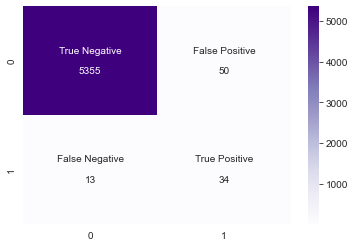

In [14]:
y_pred = TREE_BASE.predict(x_test)


print(metrics.classification_report(y_test, y_pred)),
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), cmap='Purples', fmt='')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5405
         1.0       0.72      0.81      0.76        47

    accuracy                           1.00      5452
   macro avg       0.86      0.90      0.88      5452
weighted avg       1.00      1.00      1.00      5452



<AxesSubplot:>

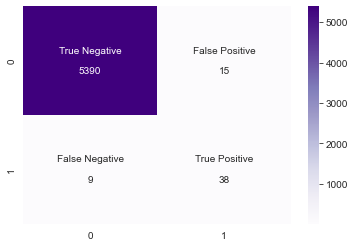

In [15]:
# FOREST_BASE.fit(x_train, y_train)
pipeline = imb_make_pipeline(ROS, FOREST_BASE)
pipeline.fit(x_train, y_train)
y_pred = FOREST_BASE.predict(x_test)

print(metrics.classification_report(y_test, y_pred)),
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), cmap='Purples', fmt='')

C:\Users\LIEN PHAM\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5405
         1.0       0.78      0.85      0.82        47

    accuracy                           1.00      5452
   macro avg       0.89      0.92      0.91      5452
weighted avg       1.00      1.00      1.00      5452



<AxesSubplot:>

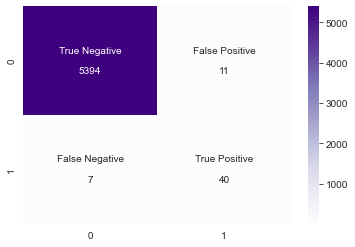

In [16]:
# FOREST_BASE.fit(x_train, y_train)
pipeline = imb_make_pipeline(ROS, XGB)
pipeline.fit(x_train, y_train)
y_pred = XGB.predict(x_test)

print(metrics.classification_report(y_test, y_pred)),
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), cmap='Purples', fmt='')

In [17]:
TREE_BASE = DecisionTreeClassifier(
    criterion='gini', 
    random_state=42, 
    max_depth=6,
    max_features='sqrt'
)

FOREST_BASE = RandomForestClassifier(
    criterion='gini', 
    random_state=42, 
    max_depth=6,
    max_features='sqrt',
    # class_weight='balanced_subsample'
)

XGB =  XGBClassifier(
    validate_parameters=True,
    tree_method='hist',
    use_label_encoder=False,
    objective='binary:logistic',
    eval_metric='aucpr',
    min_child_weight= 5,
    gamma=1,
    subsample=0.6,
    colsample_bytree=0.6,
    max_depth=6
)

SCORES = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [18]:
clrs = {
    'DT': TREE_BASE, 
    'RF': FOREST_BASE, 
    'XGB': XGB
}

# clrs = [dt_clr, rf_clr, xg_clr]

scoring_tables = []
validations = []

for clr_name, clr in clrs.items():
    pipeline = imb_make_pipeline(ROS, clr)
    validation, scoring_table = custom_cross_validation(
        pipeline, x_data, y_data, cv=CV50, 
        scoring=SCORES, n_jobs=8, return_estimator=True
    )
    scoring_tables.append(scoring_table)
    validations.append(validation)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=8)]: Done  42 out of  50 | elapsed:    5.7s remaining:    1.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    5.9s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    4.9s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   20.4s
[Parallel(n_jobs=8)]: Done  42 out of  50 | elapsed:   30.7s remaining:    5.8s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:   34.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   16.7s
[Parallel(n_jobs=8)]: Done  42 out of  50 | elapsed:   24.2s remaining:    4.5s
[Parallel(n_jobs=8)]: Done  5

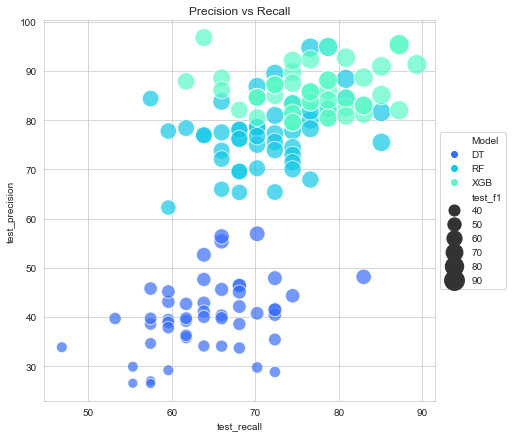

In [19]:
compared = compare_model(*scoring_tables, names=clrs.keys())

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(data=compared, x='test_recall', y='test_precision', 
                hue='Model', size='test_f1', sizes=(100, 400), alpha=0.7)
ax.set_title('Precision vs Recall')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')

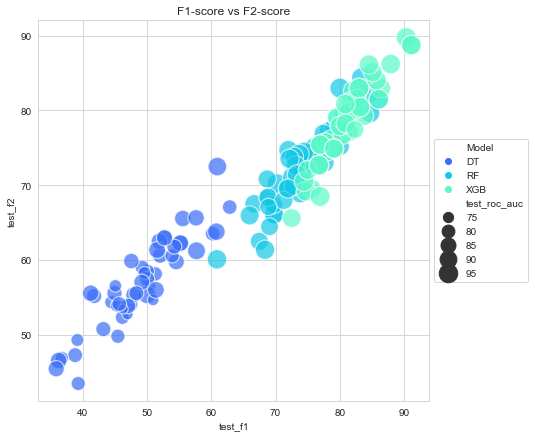

In [20]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(data=compared, x='test_f1', y='test_f2', 
                hue='Model', size='test_roc_auc', sizes=(100, 400), alpha=0.7)
ax.set_title('F1-score vs F2-score')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')

In [21]:
compared_stability = evaluate_stability(compared)
compared_stability.sort_index()

,Model,max,mean,min,std,confidence
test_accuracy,DT,99.284666,98.827859,98.220510,0.260887,378.814985
test_accuracy,XGB,99.853265,99.688164,99.596404,0.063331,1574.093210
test_accuracy,RF,99.779897,99.570767,99.339571,0.091610,1086.902302
test_balanced_accuracy,DT,91.100833,81.670824,73.006475,3.270683,24.970573
test_balanced_accuracy,XGB,94.643848,88.263456,80.814061,3.093832,28.528841
test_balanced_accuracy,RF,92.469935,85.567800,78.677151,3.030486,28.235669
test_f1,DT,62.857143,49.050947,35.862069,6.497978,7.548648
test_f1,XGB,91.111111,80.824588,72.500000,4.211788,19.190088
test_f1,RF,86.046512,74.136791,60.869565,5.319190,13.937610
test_f2,XGB,89.743590,78.226551,65.610860,5.341692,14.644525


## FEATURE FILTERING

In [22]:
feature_score_table = pd.DataFrame(
    [clr[-1].feature_importances_ for clr in validations[2]['estimator']],
    columns=x_data.columns
)

display(feature_score_table.shape, feature_score_table.head())

(50, 45)

,ACCT_AGE,ACTV_FAIL_CNT_LAST_12H,BEN_NAME_FT_AMT_mean_LAST_91D,BEN_NAME_FT_AMT_median_LAST_91D,BEN_NAME_FT_AMT_mode_LAST_91D,BEN_NAME_FT_AMT_std_LAST_91D,BEN_NAME_FT_AMT_sum_LAST_91D,BEN_NAME_FT_AMT_zscore_LAST_91D,BEN_NAME_FT_CNT_mean_LAST_91D,BEN_NAME_FT_CNT_median_LAST_91D,...,INH_IND,LATE_HR_AMT,LATE_HR_IND,LATE_HR_TRANS_CNT_LAST_91D,LOGIN_FAIL_CNT_LAST_12H,OCTET2_CNT_LAST_30D,OPEN_LOAN_IND,TRANS_AMOUNT,SESS_OPEN_LOAN_CNT,TRANS_HOUR
0,0.025901,0.159888,0.032466,0.010989,0.002122,0.020731,0.0,0.0,0.000000,0.0,...,0.007614,0.012541,0.014000,0.009023,0.007217,0.013195,0.0,0.022250,0.018238,0.008413
1,0.026716,0.145878,0.014268,0.007549,0.000000,0.030773,0.0,0.0,0.024792,0.0,...,0.007444,0.018785,0.013516,0.007335,0.008074,0.011165,0.0,0.023901,0.025194,0.007140
2,0.022723,0.157386,0.017702,0.028273,0.000000,0.032726,0.0,0.0,0.000000,0.0,...,0.011140,0.014574,0.002800,0.010219,0.010427,0.011266,0.0,0.025593,0.013481,0.008132
3,0.021956,0.204243,0.028563,0.025505,0.014480,0.023240,0.0,0.0,0.000000,0.0,...,0.011752,0.015201,0.000000,0.010337,0.008276,0.014558,0.0,0.025074,0.028613,0.009819
4,0.022380,0.191151,0.030326,0.014855,0.019461,0.013393,0.0,0.0,0.027122,0.0,...,0.013392,0.023824,0.010527,0.012332,0.006312,0.008356,0.0,0.029702,0.006723,0.008255


In [23]:
feature_scores = feature_score_table.agg(['mean', 'std']).T
feature_scores['conf'] = feature_scores['mean']/feature_scores['std']
feature_scores.sort_values('mean', ascending=False, inplace=True)
feature_scores

,mean,std,conf
DEVICE_AGENT_ACTV_FAIL_CNT_LAST_12H,0.349464,0.044059,7.931778
ACTV_FAIL_CNT_LAST_12H,0.169402,0.024543,6.902155
CHECK_INFO_CNT_LAST_12H,0.035163,0.006325,5.559595
BEN_NAME_FT_AMT_std_LAST_91D,0.026382,0.006161,4.282244
TRANS_AMOUNT,0.026154,0.003198,8.178104
DEVICE_AGENT_CNT_LAST_12H,0.025875,0.009114,2.839211
ACCT_AGE,0.023264,0.002959,7.862119
DEVICE_AGENT_FT_CNT_sum_LAST_91D,0.020374,0.004853,4.198592
BEN_NAME_FT_AMT_mean_LAST_91D,0.019577,0.007533,2.598821
BEN_NAME_FT_AMT_median_LAST_91D,0.018748,0.014335,1.307801


In [24]:
feature_scores = feature_scores[feature_scores['mean'].gt(0)]
display(
    feature_scores.shape,
    feature_scores
)

(39, 3)

,mean,std,conf
DEVICE_AGENT_ACTV_FAIL_CNT_LAST_12H,0.349464,0.044059,7.931778
ACTV_FAIL_CNT_LAST_12H,0.169402,0.024543,6.902155
CHECK_INFO_CNT_LAST_12H,0.035163,0.006325,5.559595
BEN_NAME_FT_AMT_std_LAST_91D,0.026382,0.006161,4.282244
TRANS_AMOUNT,0.026154,0.003198,8.178104
DEVICE_AGENT_CNT_LAST_12H,0.025875,0.009114,2.839211
ACCT_AGE,0.023264,0.002959,7.862119
DEVICE_AGENT_FT_CNT_sum_LAST_91D,0.020374,0.004853,4.198592
BEN_NAME_FT_AMT_mean_LAST_91D,0.019577,0.007533,2.598821
BEN_NAME_FT_AMT_median_LAST_91D,0.018748,0.014335,1.307801


In [25]:
CV30 = RepeatedStratifiedKFold(n_repeats=6)

eliminated = []
eliminated_result = pd.DataFrame()

for it, col in enumerate(feature_scores.index[10::-1]):
    print(it)
    x_rfe = x_data[feature_scores.index].drop(columns=[*eliminated, col])
    pipeline = imb_make_pipeline(ROS, XGB)
    _, scoring_table = custom_cross_validation(
        pipeline, x_rfe, y_data, scoring=SCORES, cv=CV30, n_jobs=8, verbose=0
    )

    col_stab = evaluate_stability(scoring_table)
    col_stab['feature'] = col
    col_stab['feature_count'] = x_rfe.shape[1]
    col_stab['round'] = it+1
    eliminated_result = eliminated_result.append(col_stab)
    # scores[col] = col_stab.loc['test_f2', 'mean']
    eliminated.append(col)

0


C:\Users\LIEN PHAM\AppData\Local\Temp\ipykernel_16964\2069789547.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eliminated_result = eliminated_result.append(col_stab)


1


C:\Users\LIEN PHAM\AppData\Local\Temp\ipykernel_16964\2069789547.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eliminated_result = eliminated_result.append(col_stab)


2


C:\Users\LIEN PHAM\AppData\Local\Temp\ipykernel_16964\2069789547.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eliminated_result = eliminated_result.append(col_stab)


3


C:\Users\LIEN PHAM\AppData\Local\Temp\ipykernel_16964\2069789547.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eliminated_result = eliminated_result.append(col_stab)


4


C:\Users\LIEN PHAM\AppData\Local\Temp\ipykernel_16964\2069789547.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eliminated_result = eliminated_result.append(col_stab)


5


C:\Users\LIEN PHAM\AppData\Local\Temp\ipykernel_16964\2069789547.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eliminated_result = eliminated_result.append(col_stab)


6


C:\Users\LIEN PHAM\AppData\Local\Temp\ipykernel_16964\2069789547.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eliminated_result = eliminated_result.append(col_stab)


7


C:\Users\LIEN PHAM\AppData\Local\Temp\ipykernel_16964\2069789547.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eliminated_result = eliminated_result.append(col_stab)


8


C:\Users\LIEN PHAM\AppData\Local\Temp\ipykernel_16964\2069789547.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eliminated_result = eliminated_result.append(col_stab)


9


C:\Users\LIEN PHAM\AppData\Local\Temp\ipykernel_16964\2069789547.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eliminated_result = eliminated_result.append(col_stab)


10


C:\Users\LIEN PHAM\AppData\Local\Temp\ipykernel_16964\2069789547.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eliminated_result = eliminated_result.append(col_stab)


In [26]:
eliminated_result.reset_index()

,index,min,max,mean,std,confidence,feature,feature_count,round
0,test_accuracy,99.523111,99.834923,99.694281,0.072464,1375.780035,LATE_HR_AMT,38,1
1,test_balanced_accuracy,79.740981,95.698427,88.069685,3.746021,23.510196,LATE_HR_AMT,38,1
2,test_f1,70.000000,90.526316,80.997196,4.935868,16.409918,LATE_HR_AMT,38,1
3,test_precision,73.333333,97.142857,86.922992,4.848204,17.928905,LATE_HR_AMT,38,1
4,test_recall,59.574468,91.489362,76.241135,7.498163,10.167975,LATE_HR_AMT,38,1
...,...,...,...,...,...,...,...,...,...
72,test_f1,41.860465,62.790698,52.152422,5.429257,9.605811,DEVICE_AGENT_ACTV_FAIL_CNT_LAST_12H,28,11
73,test_precision,39.622642,69.696970,57.193452,7.168344,7.978615,DEVICE_AGENT_ACTV_FAIL_CNT_LAST_12H,28,11
74,test_recall,34.042553,59.574468,48.368794,5.990198,8.074658,DEVICE_AGENT_ACTV_FAIL_CNT_LAST_12H,28,11
75,test_roc_auc,92.326254,98.651905,95.399712,1.601753,59.559547,DEVICE_AGENT_ACTV_FAIL_CNT_LAST_12H,28,11


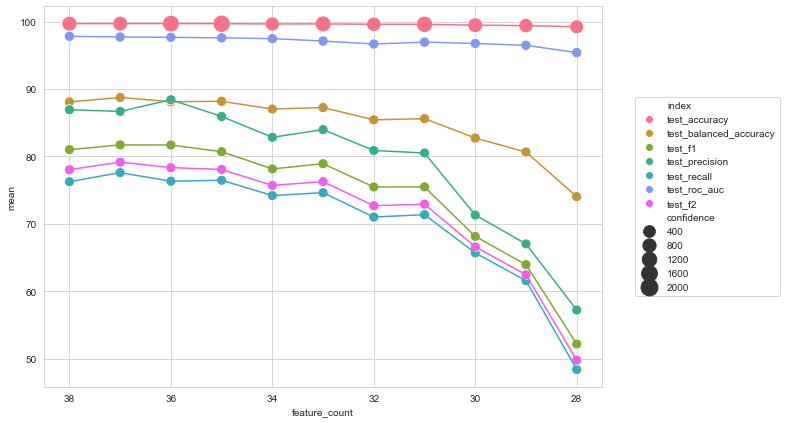

In [27]:
fig = plt.figure(figsize=(10, 7))
sns.lineplot(data=eliminated_result.reset_index(), x='feature_count', y='mean', hue='index', legend=False)
ax1 = sns.scatterplot(data=eliminated_result.reset_index(), x='feature_count', y='mean', hue='index', size='confidence', sizes=(100, 300))
ax1.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
ax1.invert_xaxis()
# ax2 = ax1.twinx()
# sns.barplot(data=plot_data, x='feature_count_str', y='feature_count', ax=ax2, alpha=0.5)


## OPTIMIZE HYPER-PARAMETERS

In [28]:
import itertools

def get_params_roulette(params_grid):
    return (dict(zip(params_grid.keys(), i)) for i in itertools.product(*params_grid.values()))

params_grid = dict(
    # min_child_weight=[1, 3]
    subsample=[0.8, 1],
    max_depth=[6, 7],
    # colsample_bytree=[0.1, 0.25, 0.5, 0.8],
    learning_rate=[0.5, 0.3, 0.1]
)

base_clr = XGBClassifier(
    validate_parameters=True,
    tree_method='hist',
    use_label_encoder=False,
    objective='binary:logistic',
    eval_metric='aucpr'
)

scoring_tables = []
validations = []
params_collection = [] 

print(f'Starting Hyper-parameter grid search for {len(list(get_params_roulette(params_grid)))} iterations!')

for i, params in enumerate(get_params_roulette(params_grid)):
    print(f'Starting iteration {i+1}!')
    params_collection.append(params)
    clr = base_clr.set_params(**{**base_clr.get_params(), **params})
    pipeline = imb_make_pipeline(ROS, clr)
    validation, scoring_table = custom_cross_validation(
        pipeline, x_data[feature_scores.index], y_data,
        scoring=SCORES, cv=CV30, n_jobs=8
    )
    scoring_tables.append(scoring_table)
    validations.append(validation)
    # if i == 5: break

Starting Hyper-parameter grid search for 12 iterations!
Starting iteration 1!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   11.7s remaining:    6.7s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   12.3s remaining:    3.7s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   14.3s remaining:    1.5s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   14.4s finished


Starting iteration 2!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   13.4s remaining:    7.7s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   14.0s remaining:    4.2s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   16.5s remaining:    1.7s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   16.7s finished


Starting iteration 3!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   14.9s remaining:    8.6s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   15.5s remaining:    4.7s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   19.3s remaining:    2.1s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   19.5s finished


Starting iteration 4!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   10.4s remaining:    6.0s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   11.0s remaining:    3.3s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   13.4s remaining:    1.4s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   13.5s finished


Starting iteration 5!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   11.5s remaining:    6.6s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   11.8s remaining:    3.5s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   14.4s remaining:    1.5s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   14.4s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Starting iteration 6!


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    4.3s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   12.9s remaining:    7.4s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   13.5s remaining:    4.0s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   16.7s remaining:    1.8s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   16.8s finished


Starting iteration 7!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:    8.8s remaining:    5.1s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:    9.5s remaining:    2.8s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   11.0s remaining:    1.1s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   11.1s finished


Starting iteration 8!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   10.1s remaining:    5.8s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   10.4s remaining:    3.1s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   12.5s remaining:    1.3s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   12.7s finished


Starting iteration 9!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   11.2s remaining:    6.4s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   11.6s remaining:    3.5s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   14.0s remaining:    1.5s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   14.1s finished


Starting iteration 10!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   10.4s remaining:    6.0s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   10.9s remaining:    3.3s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   12.6s remaining:    1.3s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   12.8s finished


Starting iteration 11!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   10.2s remaining:    5.9s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   10.9s remaining:    3.2s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   12.7s remaining:    1.3s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   12.8s finished


Starting iteration 12!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    4.5s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   12.5s remaining:    7.2s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   13.0s remaining:    3.9s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   15.8s remaining:    1.7s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   16.0s finished


In [29]:
grid_search_result = pd.DataFrame(get_params_roulette(params_grid))\
    .join(pd.DataFrame([i.mean(axis=0) for i in scoring_tables]))\
    .sort_values(['test_f1', 'test_f2', 'test_roc_auc'], ascending=False)
grid_search_result

,subsample,max_depth,learning_rate,test_accuracy,test_balanced_accuracy,test_f1,test_precision,test_recall,test_roc_auc,test_f2
4,0.8,7,0.3,99.727910,88.051493,82.774410,90.948208,76.170213,97.520957,78.656917
1,0.8,6,0.3,99.726685,88.402402,82.747786,90.117539,76.879433,97.552368,79.081036
7,1.0,6,0.3,99.722404,88.154175,82.444101,90.072371,76.382979,97.458114,78.655167
10,1.0,7,0.3,99.722407,87.837802,82.408450,90.742447,75.744681,97.611481,78.247819
6,1.0,6,0.5,99.719348,88.047176,82.352376,89.895894,76.170213,97.483930,78.506705
5,0.8,7,0.1,99.720572,87.942335,82.351058,90.321584,75.957447,97.587866,78.358214
0,0.8,6,0.5,99.717513,87.975946,82.147381,89.779899,76.028369,97.389885,78.329979
9,1.0,7,0.5,99.713845,87.728026,81.931711,89.841443,75.531915,97.658873,77.943223
3,0.8,7,0.5,99.711400,87.867404,81.847744,89.201905,75.815603,97.264786,78.096504
8,1.0,6,0.1,99.700396,87.615785,81.187976,88.501781,75.319149,97.706626,77.524410


In [30]:
with open('saved_model.ml', 'wb') as f:
    pickle.dump(XGB, f)

In [ ]:
#AUPRC : chỉ số đánh giá độ chính xác mô hình dựa trên precision, recall, tự đưa ra